In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv('GOLD.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
print('Columns: {}'.format(df.columns))
print('No of datapoints:',df.shape[0])

Columns: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Pred',
       'new'],
      dtype='object')
No of datapoints: 512


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Vol.'] = df['Vol.'].str.replace('K','').astype(float).apply(lambda x : x*10**3).astype(int)
df['Change %'] = df['Change %'].str.replace('%','').astype(float)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,2017-05-04,28060,28400,28482,28025,80,-1.79,738.0,117.570740
1,2017-05-05,28184,28136,28382,28135,60,0.44,-146.0,295.430176
2,2017-05-08,28119,28145,28255,28097,7850,-0.23,30.0,132.123714
3,2017-05-09,27981,28125,28192,27947,10100,-0.49,357.0,101.298064
4,2017-05-10,28007,28060,28146,27981,9280,0.09,124.0,112.153318


In [5]:
X_train=df[['Open','High','Low','Price']][:410]
Y_train=df['Pred'][:410]
X_test=df[['Open','High','Low','Price']][410:]

In [6]:
reg = LinearRegression().fit(X_train, Y_train)

In [7]:
reg.coef_

array([ 3., -1., -4.,  2.])

In [8]:
y_pred=reg.predict(X_test)


In [9]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_features = PolynomialFeatures(degree=1)
  
#   # transforms the existing features to higher degree features.
# X_train_poly = poly_features.fit_transform(X_train)
  
#   # fit the transformed features to Linear Regression
# poly_model = LinearRegression()
# poly_model.fit(X_train_poly, df['new'][:410])

In [10]:
# poly_model.coef_

In [11]:
df['Pred'][410:]=y_pred

c:\users\keyur\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
X_new=df[['Open','High','Low','Price']]
y_new=df['new']
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

In [13]:
reg_new = LinearRegression().fit(X_train_n, y_train_n)
reg_new.coef_

array([-1.00038716,  1.00529137, -1.01816907,  1.01319701])

In [14]:
y_pred_n=reg_new.predict(X_test_n)

In [15]:
df_compare= pd.DataFrame({'Actual': y_test_n, 'Predicted': y_pred_n})
df_compare

,Actual,Predicted
283,79.327535,78.978928
100,129.134591,128.615369
37,301.008774,301.540129
46,97.806658,98.193799
374,96.175882,95.529303
...,...,...
4,112.153318,111.690458
326,286.146378,286.636303
249,112.300304,111.964988
254,397.047959,397.711335


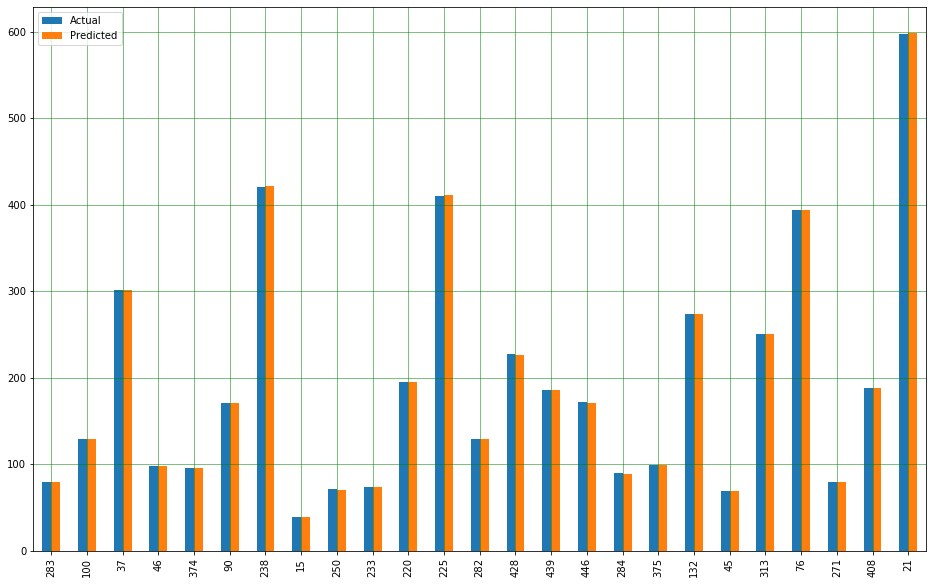

In [16]:
df1 = df_compare.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<h3>So the values of column Pred are a linear function
and the values of column new are a polynomial function</h3>

In [17]:
df_rcom=pd.read_csv('RCOM.csv')
df_nifty=pd.read_csv('Nifty50//Nifty50.csv')

In [18]:
df_rcom.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
489,RCOM,EQ,07-May-2019,2.0,2.00,2.1,2.0,2.1,2.1,2.06,64199212,1.325275e+08,9103,34677474,54.02
490,RCOM,EQ,08-May-2019,2.1,2.10,2.2,2.1,2.2,2.2,2.18,27455636,5.972756e+07,4208,14957834,54.48
491,RCOM,EQ,09-May-2019,2.2,2.30,2.3,2.3,2.3,2.3,2.30,7854126,1.806449e+07,2385,7711773,98.19
492,RCOM,EQ,10-May-2019,2.3,2.40,2.4,2.4,2.4,2.4,2.40,3584592,8.603021e+06,1560,3584592,100.00
493,RCOM,EQ,13-May-2019,2.4,2.45,2.5,2.3,2.3,2.3,2.40,42329516,1.014503e+08,9541,26309575,62.15


In [19]:
df_nifty.tail()


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19
493,13-May-2019,11258.70,11300.20,11125.60,11148.20,357586433,16722.91


In [20]:
df_beta=pd.concat([df_rcom['Date'],df_rcom['Close Price'],df_nifty['Close']],axis=1)
df_beta['Date']=pd.to_datetime(df_beta['Date'])
df_beta.head()

,Date,Close Price,Close
0,2017-05-15,32.00,9445.40
1,2017-05-16,32.10,9512.25
2,2017-05-17,31.95,9525.75
3,2017-05-18,31.05,9429.45
4,2017-05-19,30.55,9427.90


In [21]:
len=df_rcom.shape[0]
#just pre-creating dataframe columns for below calculations
df_beta['df_return_rcom']=pd.DataFrame([np.nan] * (len-1))
df_beta['df_return_nifty']=pd.DataFrame([np.nan] * (len-1))

for i in range(len-1):
    df_beta['df_return_rcom'].iloc[i]=(df_beta['Close Price'].iloc[i+1]-df_beta['Close Price'].iloc[i])/(df_beta['Close Price'].iloc[i])
    df_beta['df_return_nifty'].iloc[i]=(df_beta['Close'].iloc[i+1]-df_beta['Close'].iloc[i])/(df_beta['Close'].iloc[i])
        

c:\users\keyur\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
#As the last value is not covered here..assuming it as 0
df_beta=df_beta.fillna(0)

In [23]:
#daily values for last 3 months(90 days)
X_beta=df_beta['df_return_nifty'][-90:].values.reshape(-1,1)
y_beta=df_beta['df_return_rcom'][-90:].values.reshape(-1,1)

In [24]:
reg_beta = LinearRegression().fit(X_beta,y_beta)
reg_beta.coef_

array([[-1.527765]])

<h3>BETA VALUE FOR LAST 90 DAYS: -1.527765</h3>

In [25]:
#For monthly returns
import datetime

df_beta['year'] = pd.DatetimeIndex(df_beta['Date']).year
df_beta['month'] = pd.DatetimeIndex(df_beta['Date']).month

monthly_total = df_beta.groupby(by=['month','year']).sum()

In [26]:
monthly_total_sort=monthly_total.sort_values(by=['year','month'])

In [27]:
monthly_total_sort

,,Close Price,Close,df_return_rcom,df_return_nifty
month,year,,,,
5,2017,353.45,123481.25,-0.402109,0.018176
6,2017,416.85,201746.05,0.059866,0.000056
7,2017,506.85,206852.50,0.173612,0.050906
8,2017,487.00,207924.85,-0.074112,-0.013424
9,2017,443.05,209536.25,-0.300594,-0.011168
10,2017,334.70,202773.55,0.005015,0.057579
11,2017,302.80,227144.60,-0.272685,-0.030638
12,2017,320.40,206445.25,1.223323,0.030904
1,2018,685.10,236965.40,-0.187761,0.054478


In [28]:
X_beta_m=monthly_total_sort['df_return_nifty'][-90:].values.reshape(-1,1)
y_beta_m=monthly_total_sort['df_return_rcom'][-90:].values.reshape(-1,1)

reg_beta_m = LinearRegression().fit(X_beta_m,y_beta_m)
reg_beta_m.coef_

array([[0.74155178]])

<h3>MONTHLY BETA VALUE IS 0.74155178 </h3>

<h5>As we can see,<br>
Daily Beta Value is negative i.e -1.527765 <br>
Monthly Beta Value is positive but less that 1 i.e 0.74155178 <br> 
    
A beta less than 0, which would indicate an inverse relation to the market, is possible but highly unlikely.<br>
A beta of less than 1 means it tends to be less volatile than the market.
</h5>